# womens_clothing_e_commerce_reviews

## Context

This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

## Content

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name.

## Problem approach

This problem can be considered as a Classification or Regression problem.Our approach is to solve it as an Multiple Classification problem.

We have considered 'Rating' as the Target variable. The main objective is to predict the Women's clothing rating based on the customer reviews.

#### Load the required libraries

In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input,Embedding,Dense,Flatten,concatenate
from keras.models import Model

from IPython.display import Image

Using TensorFlow backend.


### Flowchart of the problem approach

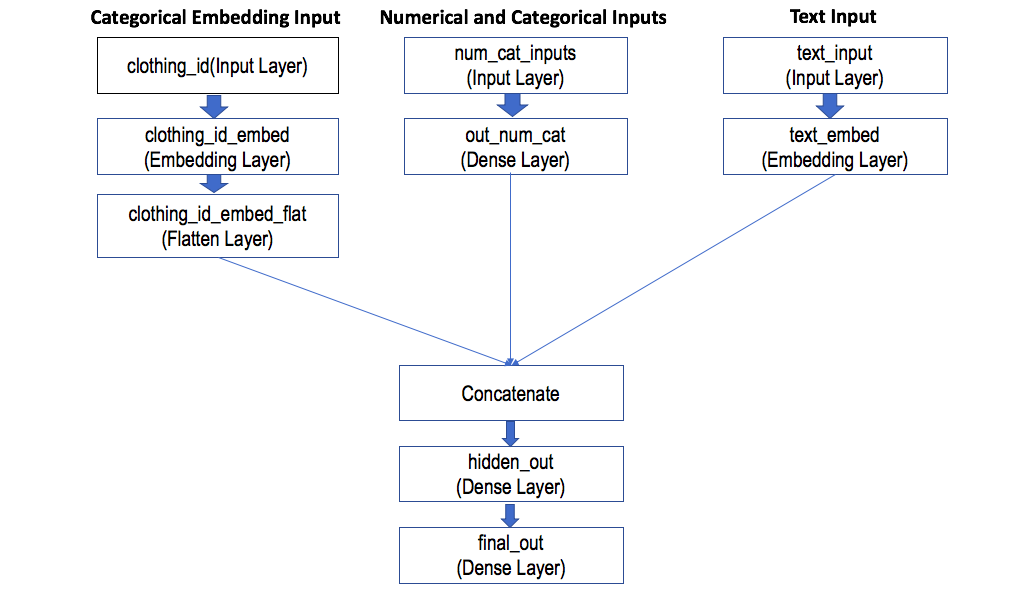

In [2]:
Image(filename='keras_func_api.png')

#### Read the data

In [3]:
#Please type the code

data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

### Understand the data

In [4]:
# Head of the data
#Please type the code

data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
# Tail of the data
#Please type the code

data.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [6]:
#Check for dtypes
#Please type the code

data.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [7]:
#Check the shape of the dateset
#Please type the code

data.shape

(23486, 11)

In [8]:
# Summary statistics
#Please type the code

data.describe(include = 'all')

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
count,23486.000000,23486.000000,23486.000000,19676,22641,23486.000000,23486.000000,23486.000000,23472,23472,23472
unique,NaN,NaN,NaN,13993,22634,NaN,NaN,NaN,3,6,20
top,NaN,NaN,NaN,Love it!,Perfect fit and i've gotten so many compliment...,NaN,NaN,NaN,General,Tops,Dresses
freq,NaN,NaN,NaN,136,3,NaN,NaN,NaN,13850,10468,6319
mean,11742.500000,918.118709,43.198544,NaN,NaN,4.196032,0.822362,2.535936,NaN,NaN,NaN
std,6779.968547,203.298980,12.279544,NaN,NaN,1.110031,0.382216,5.702202,NaN,NaN,NaN
min,0.000000,0.000000,18.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,5871.250000,861.000000,34.000000,NaN,NaN,4.000000,1.000000,0.000000,NaN,NaN,NaN
50%,11742.500000,936.000000,41.000000,NaN,NaN,5.000000,1.000000,1.000000,NaN,NaN,NaN
75%,17613.750000,1078.000000,52.000000,NaN,NaN,5.000000,1.000000,3.000000,NaN,NaN,NaN


#### Remove the column Unnamed:0 since it has sequence of unique numbers

In [9]:
data=data.drop(labels=['Unnamed: 0'], axis=1) 

In [10]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


#### Identify the unique values for each of the attributes

In [11]:
print(data.shape)
for i in data.columns.values:
    print (i)
    print (len(data[i].unique()))

(23486, 10)
Clothing ID
1206
Age
77
Title
13994
Review Text
22635
Rating
5
Recommended IND
2
Positive Feedback Count
82
Division Name
4
Department Name
7
Class Name
21


#### Change the data types accordingly

In [12]:
numerical = ['Age','Positive Feedback Count']

categorical =['Rating','Recommended IND','Division Name','Department Name','Class Name','Clothing ID']

string = ['Review Text','Title']

In [13]:
for num in numerical:
    data[num] = data[num].astype('int64')
    
for cat in categorical:
    data[cat] = data[cat].astype('category')

In [14]:
data.dtypes

Clothing ID                category
Age                           int64
Title                        object
Review Text                  object
Rating                     category
Recommended IND            category
Positive Feedback Count       int64
Division Name              category
Department Name            category
Class Name                 category
dtype: object

#### Check for missing value 

In [15]:
#Please type the code

data.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

#### Drop all the rows having Na's

In [16]:
#Please type the code

data = data.dropna(axis = 0)
data.isnull().sum() 

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

#### Get the unique levels in Clothing ID

In [17]:
clothing_ID_levels = np.size(np.unique(data['Clothing ID']))
clothing_ID_levels

1095

In [18]:
np.unique(data['Clothing ID'])

array([   1,    2,    4, ..., 1203, 1204, 1205], dtype=int64)

In [123]:
data['Clothing ID'].nunique() 

1095

In [124]:
data['Clothing ID'].unique() 

[1077, 1049, 847, 1080, 858, ..., 630, 181, 721, 262, 522]
Length: 1095
Categories (1095, int64): [1077, 1049, 847, 1080, ..., 181, 721, 262, 522]

#### Remove ClothingID and Target attribute from Categorical data for further processing

In [19]:
categorical_attr = data.select_dtypes('category').columns

categorical_attr = categorical_attr.drop(['Rating','Clothing ID'])

categorical_attr 

Index(['Recommended IND', 'Division Name', 'Department Name', 'Class Name'], dtype='object')

#### Remove ClothingID and Target attribute from Categorical data for further processing

In [20]:
target_attr = 'Rating'

### Pre-procressing of numerical variables

#### Convert integer to float ( useful for standardization further)

In [21]:
numerical_attr = data.select_dtypes('int64').columns
numerical_df = data[numerical_attr]

In [22]:
numerical_df

,Age,Positive Feedback Count
2,60,0
3,50,0
4,47,6
5,49,4
6,39,1
...,...,...
23481,34,0
23482,48,0
23483,31,1
23484,28,2


In [23]:
numerical_df=numerical_df.astype('float')
numerical_df.head()

,Age,Positive Feedback Count
2,60.0,0.0
3,50.0,0.0
4,47.0,6.0
5,49.0,4.0
6,39.0,1.0


#### Split the data into train and test

In [24]:
data_categorical_train, data_categorical_test, \
data_numerical_train, data_numerical_test, \
data_string_train, data_string_test, \
data_clothingID_train, data_clothingID_test, \
Y_train, Y_test = train_test_split(data[categorical_attr],
                                   numerical_df,
                                   data[string],
                                   data['Clothing ID'],
                                   data[target_attr],
                                   test_size=0.33, random_state=123) 

### Preprocessing of categorical variables

#### Convert categorical attributes to numeric

Ignore option is used to ignore if an unknown categorical feature is
present during transform instead of raising error. 

In [25]:
onehotencoder = OneHotEncoder(handle_unknown='ignore')

In [26]:
OneHotEncoder = onehotencoder.fit(data_categorical_train)

In [27]:

OneHotEncoder_train = OneHotEncoder.transform(data_categorical_train).toarray()
OneHotEncoder_test = OneHotEncoder.transform(data_categorical_test).toarray() 


In [28]:
OneHotEncoder_train.shape

(13173, 30)

In [29]:
OneHotEncoder_test.shape

(6489, 30)

### Preprocessing of Target variables

In [30]:
data['Rating'].unique()

[3, 5, 2, 4, 1]
Categories (5, int64): [3, 5, 2, 4, 1]

In [31]:
no_of_levels=len(data['Rating'].unique()) 

In [32]:
no_of_levels

5

In [33]:
data['Rating'].nunique()

5

Since there are 5 different levels in the Target Rating , we need to one hot encode so that no order is implied

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
onehotencoder = OneHotEncoder(handle_unknown='ignore')

In [36]:
OneHotEncoder = onehotencoder.fit(Y_train.values.get_values().reshape(-1, 1))

D:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [37]:
OneHotEncoder_target_train = OneHotEncoder.transform(Y_train.values.get_values().reshape(-1, 1)).toarray()
OneHotEncoder_target_test = OneHotEncoder.transform(Y_test.values.get_values().reshape(-1, 1)).toarray()

D:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
D:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version
  


In [70]:
Y_train.values

[3, 5, 5, 5, 5, ..., 5, 1, 4, 5, 3]
Length: 13173
Categories (5, int64): [1, 2, 3, 4, 5]

In [71]:
Y_train.values.get_values() 

D:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


array([3, 5, 5, ..., 4, 5, 3], dtype=int64)

In [72]:
Y_train.values.get_values().reshape(-1, 1)

D:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


array([[3],
       [5],
       [5],
       ...,
       [4],
       [5],
       [3]], dtype=int64)

In [38]:
OneHotEncoder_target_test.shape

(6489, 5)

In [39]:
OneHotEncoder_target_train[0]

array([0., 0., 1., 0., 0.])

In [40]:
OneHotEncoder_target_train.shape

(13173, 5)

In [41]:
OneHotEncoder_target_test[0]

array([0., 0., 0., 0., 1.])

#### Min Max Scaling

In [42]:
Scalar = MinMaxScaler()

scaled_attr = Scalar.fit(data_numerical_train)

scaled_attr_train= scaled_attr.transform(data_numerical_train)

scaled_attr_test= scaled_attr.transform(data_numerical_test)


In [43]:
scaled_attr_test

array([[0.60493827, 0.        ],
       [0.20987654, 0.        ],
       [0.08641975, 0.        ],
       ...,
       [0.27160494, 0.        ],
       [0.18518519, 0.07407407],
       [0.51851852, 0.02777778]])

In [44]:
scaled_attr

MinMaxScaler(copy=True, feature_range=(0, 1))

#### Stack both numerical and Categorical feautures

In [45]:
X_train = np.hstack((scaled_attr_train, OneHotEncoder_train))
X_train.shape

(13173, 32)

In [46]:
X_test = np.hstack((scaled_attr_test, OneHotEncoder_test))

In [47]:
X_test.shape

(6489, 32)

### Pre-Processing of Text

#### Preprocessing of Review Text

#### Get the length of the text having maximum number of occurances

#### Get the unique count of text length 

In [48]:
unique_elements, counts_elements = np.unique(data_string_train['Review Text'].apply(len),return_counts=True)

In [75]:
np.unique(data_string_train['Review Text'].apply(len)) 

array([  9,  12,  13,  15,  16,  17,  20,  22,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 19

In [74]:
np.unique(data_string_train['Review Text']) 

array(['"does this sweater make my hips look big?" my wife asked. this sweater was one of my christmas gifts to this fair maiden.\n.\n"no, love, it does not," i said, but i looked, to make sure my reflex was also correct. it\'s a beautiful sweater for my dear bride, mother of our three children, and no, it does not make her hips look big.\n\nin fact, it draws out all her lovely lines and curves, just so. and she is a modest girl, so she wears a little undershirt so that her cleavage is somewhat...um...suppre',
       '"vegan suede" makes these sound fancier than they are. i love them and they\'re super cozy and a nice change from plain leggings, but they\'re just a microfiber legging which makes the price about 20 too high even for retailer. still... i\'m sure i\'ll wear them plenty. i usually wear a 2-4 and the xs fit me, which makes me think they\'d be too large for a size 0/xs.',
       "$78 for a pair of sweats seems like a lot of money, but not when you consider the amount of wear

In [49]:
unique_elements

array([  9,  12,  13,  15,  16,  17,  20,  22,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 19

In [50]:
counts_elements

array([   1,    1,    1,    1,    1,    3,    2,    1,    3,    3,    1,
          4,    2,    2,    2,    4,    1,    1,    2,    1,    4,    1,
          4,    2,    3,    2,    3,    4,    2,    6,    4,    2,    4,
         16,   11,    7,    8,   12,   13,    9,    9,    9,   10,   12,
         14,    9,    9,   12,   12,   19,   15,   16,   20,   15,   17,
         24,   25,   11,   10,   18,   11,   12,   13,   18,   15,   23,
         22,   18,   10,   14,   17,   16,   12,   26,   16,   17,   23,
         18,   18,   12,   18,   19,   15,   30,   29,   19,   22,   15,
         17,   20,   15,   23,   23,   16,   30,   15,   29,   16,   21,
         24,   16,   21,   22,   24,   23,   24,   25,   26,   25,   25,
         22,   21,   28,   23,   26,   28,   27,   24,   21,   19,   24,
         29,   28,   24,   28,   26,   23,   26,   22,   27,   26,   20,
         23,   33,   17,   26,   23,   18,   39,   18,   21,   39,   17,
         28,   30,   28,   26,   24,   31,   31,   

#### We observe that the highest value of count is 1927 and the corresponding text length is 500 , hence we are choosing 500 as the maximum text length 

In [122]:
unique_elements[np.argmax(counts_elements)]

15

In [51]:
max_text_count_length = list(counts_elements).index(max(counts_elements))
REVIEW_TEXT_MAX_SEQUENCE_LENGTH = unique_elements[max_text_count_length]
REVIEW_TEXT_MAX_SEQUENCE_LENGTH

500

In [80]:
max_text_count_length

13

In [76]:
max(counts_elements)

719

In [77]:
len(counts_elements)

50

In [79]:
list(counts_elements).index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [78]:
list(counts_elements)

[9,
 36,
 170,
 172,
 163,
 301,
 518,
 500,
 602,
 586,
 582,
 619,
 656,
 719,
 663,
 524,
 565,
 518,
 547,
 432,
 370,
 355,
 353,
 310,
 322,
 232,
 228,
 216,
 186,
 205,
 155,
 151,
 136,
 115,
 109,
 102,
 116,
 75,
 79,
 63,
 54,
 59,
 46,
 41,
 47,
 30,
 38,
 42,
 54,
 2]

#### Tokenize the words

In [52]:
tokenizer = Tokenizer(oov_token='None')

tokenizer.fit_on_texts(data_string_train['Review Text'])

review_text_train = tokenizer.texts_to_sequences(data_string_train['Review Text'])

review_text_test = tokenizer.texts_to_sequences(data_string_test['Review Text'])

word_index_review_text = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index_review_text))

NUM_WORDS_REVIEW_TEXT = len(word_index_review_text)+1

review_text_seq_train = pad_sequences(review_text_train, maxlen=REVIEW_TEXT_MAX_SEQUENCE_LENGTH)

review_text_seq_test = pad_sequences(review_text_test, maxlen=REVIEW_TEXT_MAX_SEQUENCE_LENGTH)

Found 11986 unique tokens.


In [84]:
word_index_review_text

{'None': 1,
 'the': 2,
 'i': 3,
 'and': 4,
 'a': 5,
 'it': 6,
 'is': 7,
 'this': 8,
 'to': 9,
 'in': 10,
 'but': 11,
 'on': 12,
 'for': 13,
 'of': 14,
 'with': 15,
 'was': 16,
 'so': 17,
 'my': 18,
 'dress': 19,
 'not': 20,
 'that': 21,
 'size': 22,
 'love': 23,
 'have': 24,
 'very': 25,
 'top': 26,
 'are': 27,
 'fit': 28,
 'like': 29,
 'be': 30,
 'me': 31,
 'as': 32,
 'wear': 33,
 "it's": 34,
 'too': 35,
 'great': 36,
 'or': 37,
 "i'm": 38,
 'am': 39,
 'just': 40,
 'you': 41,
 'would': 42,
 'they': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'up': 47,
 'color': 48,
 'look': 49,
 'really': 50,
 'if': 51,
 'ordered': 52,
 'more': 53,
 'little': 54,
 'one': 55,
 'perfect': 56,
 'will': 57,
 'these': 58,
 'an': 59,
 'flattering': 60,
 'out': 61,
 'well': 62,
 '\r': 63,
 'soft': 64,
 'back': 65,
 'can': 66,
 'had': 67,
 'because': 68,
 'nice': 69,
 'bought': 70,
 'comfortable': 71,
 'when': 72,
 'than': 73,
 'all': 74,
 'cute': 75,
 'looks': 76,
 'bit': 77,
 'which': 78,
 'fits': 79,
 'la

In [81]:
NUM_WORDS_REVIEW_TEXT

11987

In [82]:
review_text_seq_train

array([[   0,    0,    0, ...,    7,   20, 1842],
       [   0,    0,    0, ...,    4, 1103, 1300],
       [   0,    0,    0, ..., 6839,    9,   22],
       ...,
       [   0,    0,    0, ...,  625,    4,   36],
       [   0,    0,    0, ...,  489,   30,   87],
       [   0,    0,    0, ...,    6,  544,   62]])

In [85]:
review_text_seq_train.shape

(13173, 500)

In [87]:
review_text_seq_test.shape

(6489, 500)

In [83]:
review_text_seq_test

array([[    0,     0,     0, ...,    62,   333,     6],
       [    0,     0,     0, ...,    68,    14,   131],
       [    0,     0,     0, ...,  1085,    40, 11807],
       ...,
       [    0,     0,     0, ...,  4332,  1824,     1],
       [    0,     0,     0, ...,   358,    17,  1038],
       [    0,     0,     0, ...,    22,     3,    39]])

###### Load the GloVe word embedding file into memory as a dictionary of word to embedding array.

__Note__: Filter the embedding for the unique words in the training data.

https://nlp.stanford.edu/projects/glove/

In [53]:
# load the whole embedding into memory
embeddings_index = dict()

f = open('glove.6B.50d.txt', encoding = 'utf-8')

for line in f:
    
    values = line.split()
    
    word = values[0]
    
    coefs = np.asarray(values[1:], dtype='float32')
    
    embeddings_index[word] = coefs
    
f.close()

print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 400000 word vectors.


#### Next, create a matrix of one embedding for each word in the training dataset. We can do that by enumerating all unique words in the Tokenizer.word_index and locating the embedding weight vector from the loaded GloVe embedding.

#### The result is a matrix of weights only for words we will see during training.

#### Also count the number of words not present in the glove to decide whether we need to train or not


In [54]:
# create a weight matrix for words in training docs

review_embedding_matrix = np.zeros((NUM_WORDS_REVIEW_TEXT,50))

review_word_not_in_glove_count = 0

review_word_not_in_glove =[]

for word, i in tokenizer.word_index.items():
    
    embedding_vector = embeddings_index.get(word)
    
    if embedding_vector is not None:
        
        review_embedding_matrix[i] = embedding_vector
        
    else:
        review_word_not_in_glove.append(word)
        
        review_word_not_in_glove_count = review_word_not_in_glove_count+1
        

In [55]:
print(review_embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.41800001  0.24968    -0.41242    ... -0.18411    -0.11514
  -0.78580999]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.17242    -0.086107   -0.78268999 ... -1.3312      0.36011001
  -0.26620001]
 [ 0.40204    -2.33529997  0.22948    ...  0.81226999 -0.63955998
   0.76555002]]


In [56]:
print(review_word_not_in_glove)

['None', "it's", "i'm", '\r', "don't", "didn't", "doesn't", "can't", "i've", "wasn't", "5'4", "isn't", "i'd", "5'3", "5'5", "couldn't", "that's", "5'2", "5'7", "i'll", 'xxs', "you're", "5'8", "wouldn't", "5'6", "they're", 'pilcro', "5'", "won't", "5'1", "there's", "5'9", "haven't", '34d', "5'10", "aren't", '36d', "you'll", 'xsp', '0p', '34dd', '36dd', "would've", '135lbs', 'xxsp', '120lbs', '30dd', "weren't", "you'd", "it'll", "retailer's", '32dd', '00p', 'xsmall', '130lbs', '140lbs', 'tshirt', '125lbs', "5'0", 'skinnies', '115lbs', "5'11", "shouldn't", "they'd", "could've", "model's", "what's", "hadn't", '110lbs', 'pxs', 'jsut', "it'd", '145lbs', "70's", "5'4''", 'armhole', "you've", '34ddd', 'cartonnier', "they'll", 'deletta', "she's", '36ddd', 'skort', 'jeggings', 'heathered', 'bralette', "one's", "year's", "here's", '34f', '100lbs', '34g', "dind't", "6'", '128lbs', "let's", '150lbs', 'skinnys', 'pxxs', '105lbs', 'pilcros', '32ddd', "they've", "60's", 'snugger', '34aa', 'stevies', "

In [57]:
print(review_word_not_in_glove_count)

1943


#### Similar text preprocessing for Title below

#### Get the lines having unique length size

In [58]:
unique_elements, counts_elements = np.unique(data_string_train['Title'].apply(len),return_counts=True)

In [59]:
unique_elements

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52],
      dtype=int64)

In [60]:
counts_elements

array([  9,  36, 170, 172, 163, 301, 518, 500, 602, 586, 582, 619, 656,
       719, 663, 524, 565, 518, 547, 432, 370, 355, 353, 310, 322, 232,
       228, 216, 186, 205, 155, 151, 136, 115, 109, 102, 116,  75,  79,
        63,  54,  59,  46,  41,  47,  30,  38,  42,  54,   2], dtype=int64)

#### Select the Max Sequence length

In [121]:
unique_elements[np.argmax(counts_elements)]

15

In [61]:
max_text_count_length = list(counts_elements).index(max(counts_elements))
TITLE_MAX_SEQUENCE_LENGTH = unique_elements[max_text_count_length]
TITLE_MAX_SEQUENCE_LENGTH

15

In [90]:
max(counts_elements)

719

In [91]:
max_text_count_length

13

In [89]:
list(counts_elements).index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [88]:
list(counts_elements)

[9,
 36,
 170,
 172,
 163,
 301,
 518,
 500,
 602,
 586,
 582,
 619,
 656,
 719,
 663,
 524,
 565,
 518,
 547,
 432,
 370,
 355,
 353,
 310,
 322,
 232,
 228,
 216,
 186,
 205,
 155,
 151,
 136,
 115,
 109,
 102,
 116,
 75,
 79,
 63,
 54,
 59,
 46,
 41,
 47,
 30,
 38,
 42,
 54,
 2]

#### Tokenize the Title text

In [62]:
tokenizer = Tokenizer(oov_token='None')

tokenizer.fit_on_texts(data_string_train['Title'])

title_train = tokenizer.texts_to_sequences(data_string_train['Title'])

title_test = tokenizer.texts_to_sequences(data_string_test['Title'])

word_index_title = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index_title))

NUM_WORDS_TITLE = len(word_index_title)+1

title_text_seq_train = pad_sequences(title_train, maxlen=TITLE_MAX_SEQUENCE_LENGTH)

title_text_seq_test = pad_sequences(title_test, maxlen=TITLE_MAX_SEQUENCE_LENGTH)


Found 3117 unique tokens.


In [92]:
NUM_WORDS_TITLE

3118

In [95]:
word_index_title 

{'None': 1,
 'love': 2,
 'and': 3,
 'great': 4,
 'dress': 5,
 'but': 6,
 'cute': 7,
 'beautiful': 8,
 'top': 9,
 'for': 10,
 'the': 11,
 'not': 12,
 'this': 13,
 'a': 14,
 'perfect': 15,
 'it': 16,
 'pretty': 17,
 'so': 18,
 'very': 19,
 'fit': 20,
 'in': 21,
 'to': 22,
 'runs': 23,
 'nice': 24,
 'flattering': 25,
 'too': 26,
 'comfortable': 27,
 'lovely': 28,
 'sweater': 29,
 'gorgeous': 30,
 'soft': 31,
 'comfy': 32,
 'summer': 33,
 'i': 34,
 'super': 35,
 'on': 36,
 'small': 37,
 'me': 38,
 'shirt': 39,
 'fun': 40,
 'color': 41,
 'is': 42,
 'quality': 43,
 'with': 44,
 'large': 45,
 'fabric': 46,
 'skirt': 47,
 'unique': 48,
 'fall': 49,
 'pants': 50,
 'versatile': 51,
 'of': 52,
 'my': 53,
 'big': 54,
 'tee': 55,
 'adorable': 56,
 'like': 57,
 'just': 58,
 'design': 59,
 'jeans': 60,
 'size': 61,
 'casual': 62,
 'piece': 63,
 'as': 64,
 'good': 65,
 'these': 66,
 'jacket': 67,
 'short': 68,
 'style': 69,
 'amazing': 70,
 'favorite': 71,
 'blouse': 72,
 'stylish': 73,
 'colors': 74,

In [96]:
title_text_seq_test.shape

(6489, 15)

In [97]:
title_text_seq_train.shape

(13173, 15)

In [94]:
title_text_seq_test

array([[  0,   0,   0, ...,   0,   4,  50],
       [  0,   0,   0, ..., 546,  26, 178],
       [  0,   0,   0, ...,   0, 185,  39],
       ...,
       [  0,   0,   0, ...,   7,   6,  89],
       [  0,   0,   0, ...,  14,  75, 445],
       [  0,   0,   0, ..., 116,  14,  71]])

In [93]:
title_text_seq_train 

array([[   0,    0,    0, ...,    0,   12, 1562],
       [   0,    0,    0, ...,    0,  306,  205],
       [   0,    0,    0, ...,    2,   13,   29],
       ...,
       [   0,    0,    0, ...,    0,    4,    6],
       [   0,    0,    0, ...,    0,    4,   50],
       [   0,    0,    0, ...,  107,   10,   38]])

#### Also count the number of words not present in the glove to decide whether we need to train or not

In [63]:
# create a weight matrix for words in training docs

title_embedding_matrix = np.zeros((NUM_WORDS_TITLE,50))

title_word_not_in_glove_count = 0

title_word_not_in_glove =[]

for word, i in tokenizer.word_index.items():
    
    embedding_vector = embeddings_index.get(word)
    
    if embedding_vector is not None:
        
        title_embedding_matrix[i] = embedding_vector
        
    else:
        title_word_not_in_glove.append(word)
        
        title_word_not_in_glove_count = title_word_not_in_glove_count+1

In [64]:
print(title_word_not_in_glove_count)

286


In [99]:
embedding_vector

array([ 1.7083  ,  0.64054 , -0.2185  , -0.24855 ,  0.41358 , -1.2714  ,
       -0.83808 ,  0.20647 , -0.47952 , -0.3326  , -0.53356 , -0.69724 ,
        0.14738 , -0.47473 ,  0.43725 ,  0.49808 ,  0.19598 ,  0.021814,
        0.053176,  0.76468 , -0.36217 ,  0.28132 , -0.96149 , -0.59716 ,
        0.69219 , -0.21199 , -1.5004  ,  0.6305  ,  0.42963 , -0.1234  ,
        1.5583  , -1.1231  ,  0.55344 , -0.17596 , -0.21841 ,  1.259   ,
       -0.17553 ,  0.058404,  0.33516 ,  0.48275 , -0.56892 , -0.67092 ,
        0.59512 ,  0.37597 ,  0.27892 ,  0.70864 , -0.29497 , -1.0092  ,
       -0.01016 , -2.2664  ], dtype=float32)

In [98]:
title_word_not_in_glove

['None',
 "didn't",
 "it's",
 "don't",
 "can't",
 "doesn't",
 "i'm",
 'pilcro',
 "you're",
 "i've",
 "couldn't",
 "i'd",
 'versitle',
 "won't",
 "wasn't",
 'versitile',
 "aren't",
 'tshirt',
 "what's",
 'buttondown',
 "there's",
 'adorbs',
 'stevies',
 "you'll",
 "80's",
 'soooooo',
 "retailer's",
 'pefect',
 "70's",
 "isn't",
 'comfotable',
 "season's",
 "year's",
 'flowey',
 'mazing',
 "i'll",
 "pj's",
 'awsome',
 'skort',
 'everygirl',
 'maaji',
 "girl's",
 'pilly',
 'sweatercoat',
 'beatiful',
 'bralette',
 'georgeous',
 "time's",
 "haven't",
 'lokka',
 'zippery',
 'flatteuing',
 'preggers',
 'potentail',
 "men's",
 'sbags',
 'upsize',
 'colorway',
 "'v'",
 "n'flare",
 'petties',
 'stunna',
 'deaux',
 'antoher',
 'looove',
 'swtr',
 "valentine's",
 "woman's",
 'yasss',
 'calssic',
 "chino's",
 'pirchase',
 "1950's",
 'fupa',
 "material's",
 'gerat',
 'wayyy',
 'cowlneck',
 'heihei',
 'tanl',
 'beautifil',
 'ehhh',
 'sandstripe',
 'saizing',
 'jegging',
 'frompy',
 "rue's",
 'expext

### Attribute Clothing ID is not treated as a continuous variable since the values are repeating
Since there are 1095 different values in 'Clothing ID' dummyfying it will cause sparser matrix (having many 0's)

Therefore we are choosing to use categorical embedding

In [65]:
clothing_id_levels_encoded=LabelEncoder().fit(data['Clothing ID'])

In [66]:
clothing_id_levels_encoded_train=clothing_id_levels_encoded.transform(data_clothingID_train)

clothing_id_levels_encoded_test=clothing_id_levels_encoded.transform(data_clothingID_test)

In [100]:
clothing_id_levels_encoded

LabelEncoder()

In [101]:
clothing_id_levels_encoded_train

array([762, 974, 811, ..., 973, 940, 990], dtype=int64)

In [102]:
clothing_id_levels_encoded_train.shape

(13173,)

In [103]:
clothing_id_levels_encoded_test.shape

(6489,)

In [126]:
clothing_ID_levels

1095

### Build the model using functional api

#### Categorical embedding of Clothing ID

In [104]:
#Please type the code

clothing_id_input = Input(shape=(1, ), name="Clothing_ID")

clothing_id_embed = Embedding(input_dim=clothing_ID_levels, output_dim=50)(clothing_id_input)

clothing_id_embed_flat = Flatten()(clothing_id_embed)


In [105]:
clothing_id_embed_flat

<tf.Tensor 'flatten_1/Reshape:0' shape=(None, None) dtype=float32>

In [106]:
clothing_id_embed_flat.shape

TensorShape([None, None])

In [127]:
clothing_id_embed

<tf.Tensor 'embedding_2/embedding_lookup/Identity_1:0' shape=(None, 1, 50) dtype=float32>

#### Dense layer for numerical features

In [107]:
#Please type the code

num_cat_inputs = Input(shape=(X_train.shape[1],),name='num_cat_inputs')

out_num_cat = Dense(64, activation='relu')(num_cat_inputs)


#### Embedding layer for Review Text

#### If there are more than one word in the training data which are not present in Glove then train the embedding layer

In [108]:
#Please type the missing code

review_text_input= Input(shape=(REVIEW_TEXT_MAX_SEQUENCE_LENGTH,),name='review_text_input')

if (review_word_not_in_glove_count<=1):
    text_embed = Embedding(input_dim=NUM_WORDS_REVIEW_TEXT,output_dim=50,
                           weights=[review_embedding_matrix],trainable=False)(review_text_input)
else:
    text_embed = Embedding(input_dim=NUM_WORDS_REVIEW_TEXT,output_dim=50,
                           weights=[review_embedding_matrix],trainable=True)(review_text_input)

review_out_text = Flatten()(text_embed)


In [128]:
text_embed

<tf.Tensor 'embedding_4/embedding_lookup/Identity_1:0' shape=(None, 15, 50) dtype=float32>

In [129]:
review_text_input

<tf.Tensor 'review_text_input:0' shape=(None, 500) dtype=float32>

#### Embedding layer for Title

In [109]:
title_text_input= Input(shape=(TITLE_MAX_SEQUENCE_LENGTH,),name='title_text_input')

if (title_word_not_in_glove_count<=1):
    text_embed = Embedding(input_dim=NUM_WORDS_TITLE,output_dim=50,
                           weights=[title_embedding_matrix],trainable=False)(title_text_input)
else:
    text_embed = Embedding(input_dim=NUM_WORDS_TITLE,output_dim=50,
                           weights=[title_embedding_matrix],trainable=True)(title_text_input)

title_out_text = Flatten()(text_embed) 


In [130]:
text_embed

<tf.Tensor 'embedding_4/embedding_lookup/Identity_1:0' shape=(None, 15, 50) dtype=float32>

In [131]:
title_text_input

<tf.Tensor 'title_text_input:0' shape=(None, 15) dtype=float32>

#### Concatenate the output of above layers.

In [110]:
#Please type the code

concatenated = concatenate([clothing_id_embed_flat, out_num_cat, review_out_text, title_out_text])

X = Dense(8, activation='relu')(concatenated)

final_out = Dense(no_of_levels, activation='softmax')(X)


In [111]:
model = Model(inputs=[clothing_id_input,num_cat_inputs,review_text_input,title_text_input], outputs=final_out)

In [112]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Clothing_ID (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
review_text_input (InputLayer)  (None, 500)          0                                            
__________________________________________________________________________________________________
title_text_input (InputLayer)   (None, 15)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 50)        54750       Clothing_ID[0][0]                
____________________________________________________________________________________________

In [141]:
(32 * 64) + 64              # num_cat_inputs

2112

In [138]:
3118 * 50                   # title_text_input

155900

In [136]:
11987 * 50                  # review_text_input

599350

In [132]:
50 + 64 + 25000 + 750        # Concatenate(Flatten + Dense) 

25864

In [133]:
(25864 * 8) + 8

206920

In [135]:
1095 * 50                      # Clothing_ID

54750

In [113]:
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [114]:
model.fit([clothing_id_levels_encoded_train, X_train,
           review_text_seq_train, title_text_seq_train], 
           y = OneHotEncoder_target_train, 
           epochs=10,validation_split=0.20)

D:\Softwares\Anaconda\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10538 samples, validate on 2635 samples
Epoch 1/10
10538/10538 [==============================] - 10s 975us/step - loss: 1.0113 - accuracy: 0.5627 - val_loss: 0.9058 - val_accuracy: 0.5670
Epoch 2/10
10538/10538 [==============================] - 9s 832us/step - loss: 0.8092 - accuracy: 0.6236 - val_loss: 0.8796 - val_accuracy: 0.6148
Epoch 3/10
10538/10538 [==============================] - 9s 836us/step - loss: 0.7401 - accuracy: 0.6845 - val_loss: 0.8930 - val_accuracy: 0.6262
Epoch 4/10
10538/10538 [==============================] - 9s 827us/step - loss: 0.6641 - accuracy: 0.7172 - val_loss: 0.8319 - val_accuracy: 0.6452
Epoch 5/10
10538/10538 [==============================] - 9s 830us/step - loss: 0.5847 - accuracy: 0.7376 - val_loss: 0.8211 - val_accuracy: 0.6433
Epoch 6/10
10538/10538 [==============================] - 9s 834us/step - loss: 0.5299 - accuracy: 0.7703 - val_loss: 0.8369 - val_accuracy: 0.6512
Epoch 7/10
10538/10538 [==============================] - 9s 8

In [115]:
model.evaluate([clothing_id_levels_encoded_train,X_train,review_text_seq_train,title_text_seq_train], 
               y=OneHotEncoder_target_train)

13173/13173 [==============================] - 2s 143us/step


[0.46667008535525145, 0.8268427848815918]

In [116]:
model.evaluate([clothing_id_levels_encoded_test, X_test, review_text_seq_test, title_text_seq_test], 
               y=OneHotEncoder_target_test)

6489/6489 [==============================] - 1s 136us/step


[0.8808063264344319, 0.6404684782028198]

In [117]:
pred = model.predict([clothing_id_levels_encoded_test, X_test,
                      review_text_seq_test, title_text_seq_test])

In [118]:
pred

array([[1.30106592e-09, 3.49365973e-06, 4.34305402e-05, 4.47171833e-03,
        9.95481372e-01],
       [3.02720821e-07, 4.96248435e-03, 1.41517013e-01, 8.42548132e-01,
        1.09721646e-02],
       [2.06663027e-01, 4.31873769e-01, 3.42622548e-01, 6.94153830e-03,
        1.18991202e-02],
       ...,
       [1.55360418e-08, 1.85497000e-03, 1.09249532e-01, 8.27754974e-01,
        6.11405037e-02],
       [1.00030554e-02, 2.81434327e-01, 6.18920267e-01, 7.40212053e-02,
        1.56211480e-02],
       [2.41448088e-08, 8.49396165e-05, 1.11309171e-03, 1.19577255e-02,
        9.86844182e-01]], dtype=float32)

In [119]:
pred.shape

(6489, 5)

In [120]:
y_classes=pred.argmax(axis=1)
y_classes

array([4, 3, 1, ..., 3, 2, 4], dtype=int64)

In [142]:
y_classes.shape

(6489,)

# References

https://keras.io/models/model/